# Imports

c:\Users\a847933\Anaconda3\envs\lang\Lib\site-packages\pydantic\_internal\_generate_schema.py:547: UserWarning: <built-in function any> is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


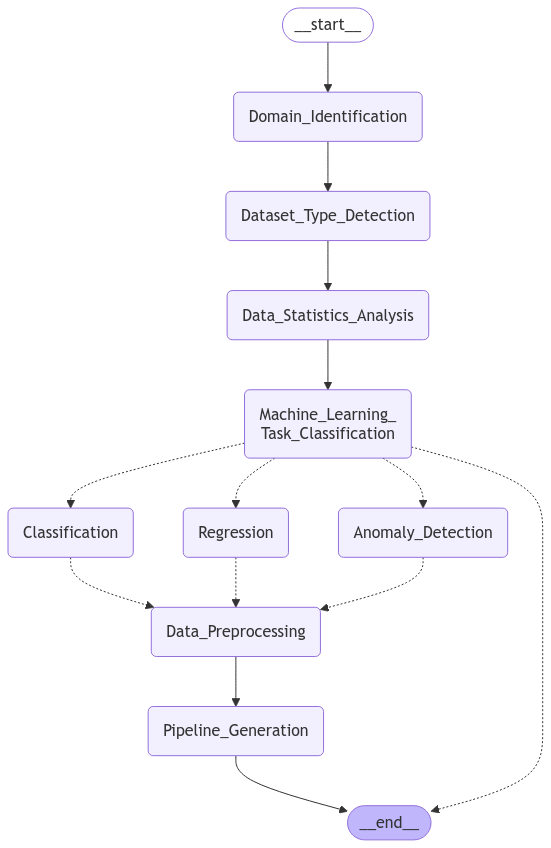

In [2]:
from langgraph.graph import StateGraph, START, END
from nodes.domain_identification import domain_identification
from nodes.dataset_type_detection import dataset_type_detection
from nodes.machine_learning_task_classification import task_classification
from nodes.data_preprocessing import data_preprocessing, fan_out_data_preprocessing
from nodes.pipeline_generation import pipeline_generation
from nodes.data_statistics_analysis import data_statistics_analysis
from nodes.algorithm_recommendation import regression_algorithm_selection, \
                                            classification_algorithm_selection, \
                                            anomaly_detection_algorithm_selection, \
                                            algorithm_selection_branch

from states.state import OverallState
from IPython.display import Image

DataSet = StateGraph(OverallState)
DataSet.add_node("Domain_Identification", domain_identification)
DataSet.add_node("Dataset_Type_Detection", dataset_type_detection)
DataSet.add_node("Machine_Learning_\nTask_Classification", task_classification)
DataSet.add_node("Data_Statistics_Analysis", data_statistics_analysis)
DataSet.add_node("Regression", regression_algorithm_selection)
DataSet.add_node("Classification", classification_algorithm_selection)
DataSet.add_node("Anomaly_Detection", anomaly_detection_algorithm_selection)
DataSet.add_node("Data_Preprocessing", data_preprocessing)
DataSet.add_node("Pipeline_Generation", pipeline_generation)

DataSet.add_edge(START, "Domain_Identification")
DataSet.add_edge("Domain_Identification", "Dataset_Type_Detection")
DataSet.add_edge("Dataset_Type_Detection","Data_Statistics_Analysis")
DataSet.add_edge("Data_Statistics_Analysis","Machine_Learning_\nTask_Classification")

DataSet.add_conditional_edges("Machine_Learning_\nTask_Classification", algorithm_selection_branch, ["Regression", "Classification","Anomaly_Detection", END])
DataSet.add_conditional_edges("Classification", fan_out_data_preprocessing, ["Data_Preprocessing"])
DataSet.add_conditional_edges("Regression", fan_out_data_preprocessing, ["Data_Preprocessing"])
DataSet.add_conditional_edges("Anomaly_Detection", fan_out_data_preprocessing, ["Data_Preprocessing"])
DataSet.add_edge("Data_Preprocessing", "Pipeline_Generation")
DataSet.add_edge("Pipeline_Generation", END)

app = DataSet.compile()
Image(app.get_graph().draw_mermaid_png())

final_state = app.invoke({"description": """The dataset contains information about the Boiler values.""","dataframe": df})

In [7]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

n_samples = 100

feature1 = np.random.rand(n_samples) * 10
feature2 = np.random.randint(1, 100, n_samples)
feature3 = np.random.normal(50, 10, n_samples)

target = np.random.choice([0, 1], size=n_samples, p=[0.5, 0.5])

df = pd.DataFrame({
    'Feature1': feature1,
    'Feature2': feature2,
    'Feature3': feature3,
    'Target': target
})

csv_file = 'generated_data.csv'
df.to_csv(csv_file, index=False)

sta = app.invoke({"description": """The dataset contains information about the Boiler values.""","dataframe": df})

In [4]:
sta

{'dataframe':     Feature1  Feature2   Feature3  Target
 0   3.745401        63  45.835436       0
 1   9.507143        96  58.575033       1
 2   7.319939        52  57.181283       0
 3   5.986585        96  40.485282       1
 4   1.560186         4  44.638399       0
 ..       ...       ...        ...     ...
 95  4.937956        73  51.409074       0
 96  5.227328        59  53.544196       0
 97  4.275410        70  31.196874       1
 98  0.254191        80  59.663920       1
 99  1.078914        93  44.890555       1
 
 [100 rows x 4 columns],
 'description': 'The dataset contains information about the Boiler values.',
 'domain': {'type': 'industry',
  'cause': "The mention of 'Boiler values' suggests a focus on industrial equipment or processes, indicating a domain related to industry."},
 'task': {'type': 'classification',
  'target': 'Target',
  'cause': 'The target column is of type int32 with only 2 unique values, indicating a classification problem with discrete classes.'},

In [5]:
sta["pipeline"]["RandomForestClassifier"].fit(df.drop("Target", axis=1), df["Target"])

Pipeline(steps=[('data_preprocessing', 'passthrough'),
                ('Imputing', 'passthrough'),
                ('model', RandomForestClassifier(random_state=42))])

In [6]:
sta["pipeline"]["RandomForestClassifier"].predict(df.drop("Target", axis=1))

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1])